In [ ]:
#mengimport drive untuk memanggil dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#mengimport beberapa library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
#nama dataframe adalah df yang berisi data dari datatahuu.csv
df = pd.read_csv('/content/gdrive/MyDrive/TugasAkhir/datatahu2.csv')

In [ ]:
df.head()

,Biaya Produksi,Total produksi,Total penjualan
0,6384000,26100,25620
1,10012000,39046,38406
2,5500000,21020,20170
3,6258000,22988,18008
4,5124000,20112,19746


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Biaya Produksi   24 non-null     int64
 1   Total produksi   24 non-null     int64
 2   Total penjualan  24 non-null     int64
dtypes: int64(3)
memory usage: 704.0 bytes


In [ ]:
#melihat statistical description dari data mulai dari mean, kuartil, standard devition dll
pd.options.display.float_format = '{:.0f}'.format # untuk mengatur format desimal

df.describe()

,Biaya Produksi,Total produksi,Total penjualan
count,24,24,24
mean,6977625,28170,26172
std,1972788,7611,7877
min,4220000,17712,14865
25%,5758500,23630,20545
50%,6246500,25000,23511
75%,8007000,33446,30062
max,11326000,42884,41421


In [ ]:
#mengubah nama kolom
df= df.rename(columns={"Biaya Produksi":"biaya_produksi", "Total produksi":"total_produksi",
                       "Total penjualan":"total_penjualan"})

In [ ]:
#menampilkan data yang sudah di preprocess
df.head(6)

,biaya_produksi,total_produksi,total_penjualan
0,6384000,26100,25620
1,10012000,39046,38406
2,5500000,21020,20170
3,6258000,22988,18008
4,5124000,20112,19746
5,9344000,37425,35810


In [ ]:
#mencari missing value
#hasilnya data yang dimiliki tidak ada missing value
df.isnull().sum()

,0
biaya_produksi,0
total_produksi,0
total_penjualan,0


In [ ]:
df.head()

,biaya_produksi,total_produksi,total_penjualan
0,6384000,26100,25620
1,10012000,39046,38406
2,5500000,21020,20170
3,6258000,22988,18008
4,5124000,20112,19746


In [ ]:
list_variabel =['biaya_produksi', 'total_produksi', 'total_penjualan']

In [ ]:
Q1 = df[list_variabel].quantile(0.25)
Q3 = df[list_variabel].quantile(0.75)
IQR = Q3 - Q1

# Menentukan apakah setiap nilai dalam list_variabel adalah outlier
outliers_mask = (df[list_variabel] < (Q1 - 1.5 * IQR)) | (df[list_variabel] > (Q3 + 1.5 * IQR))

# Menentukan baris mana yang memiliki outlier
outliers_count_specified = outliers_mask.any(axis=1)

# Menampilkan hasil
print("Mask outlier untuk setiap kolom:")
print(outliers_mask)
print("\nBaris dengan outlier (True berarti baris tersebut memiliki setidaknya satu outlier):")
print(outliers_count_specified)

Mask outlier untuk setiap kolom:
    biaya_produksi  total_produksi  total_penjualan
0            False           False            False
1            False           False            False
2            False           False            False
3            False           False            False
4            False           False            False
5            False           False            False
6            False           False            False
7            False           False            False
8            False           False            False
9            False           False            False
10           False           False            False
11           False           False            False
12           False           False            False
13           False           False            False
14           False           False            False
15           False           False            False
16           False           False            False
17           False           Fa

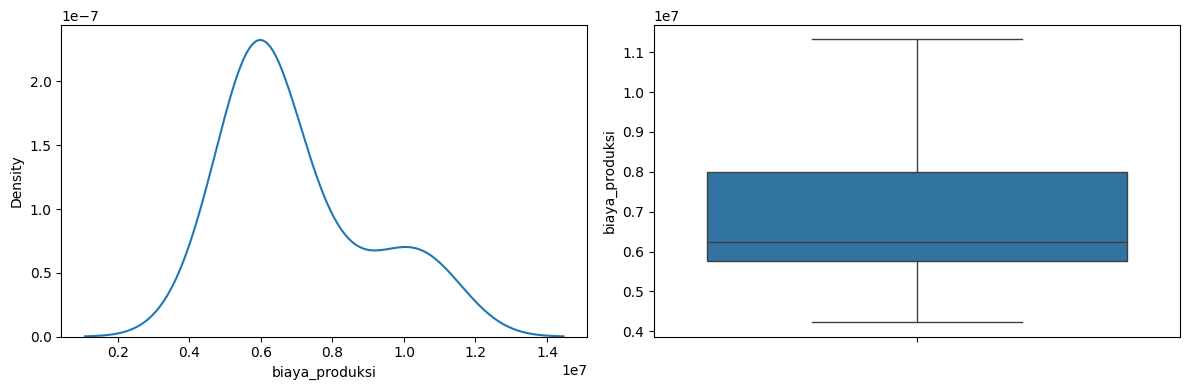

In [ ]:
#menganalisis univariat total produksi
#melihat distribusi total produksi

#mengatur ukuran gambar
plt.figure(figsize=(12, 4))

#membuat subplot
#mengatur plot KDE (Kernel Density Estimate)
plt.subplot(1, 2, 1)
sns.kdeplot(df['biaya_produksi'])

#Box plot
plt.subplot(1, 2, 2)
sns.boxplot(df['biaya_produksi'])

# menampilkan plot
plt.tight_layout()
plt.show()

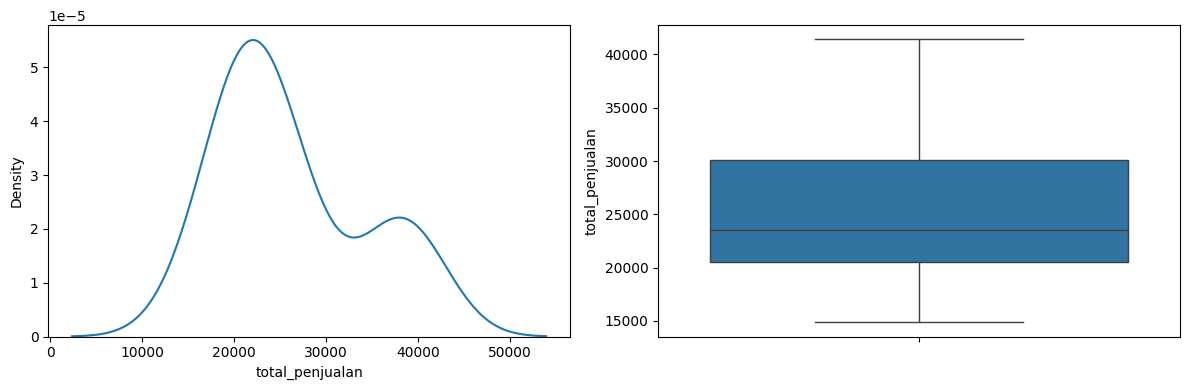

In [ ]:
#menganalisis univariat total penjualan
#melihat distribusi total penjualan

#mengatur ukuran gambar
plt.figure(figsize=(12, 4))

#membuat subplot
#mengatur plot KDE (Kernel Density Estimate)
plt.subplot(1, 2, 1)
sns.kdeplot(df['total_penjualan'])

#Box plot
plt.subplot(1, 2, 2)
sns.boxplot(df['total_penjualan'])

# menampilkan plot
plt.tight_layout()
plt.show()

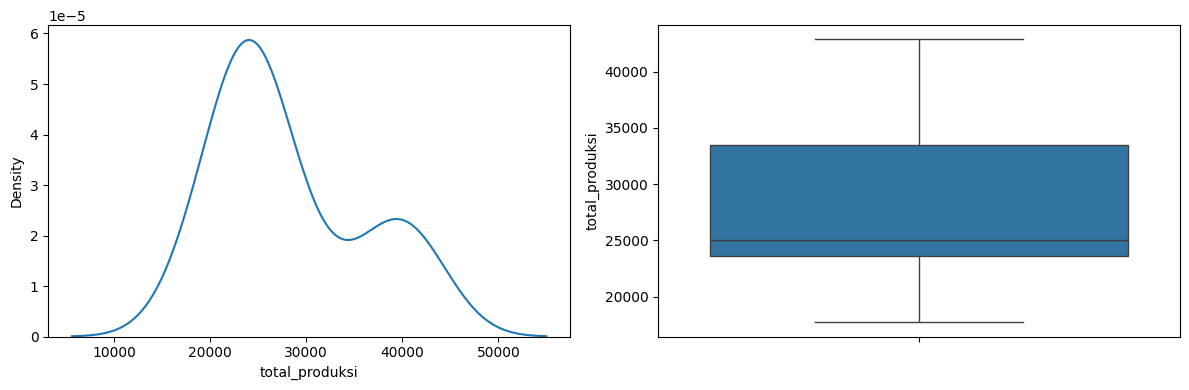

In [ ]:
#menganalisis univariat total produksi
#melihat distribusi total produksi

#mengatur ukuran gambar
plt.figure(figsize=(12, 4))

#membuat subplot
#mengatur plot KDE (Kernel Density Estimate)
plt.subplot(1, 2, 1)
sns.kdeplot(df['total_produksi'])

#Box plot
plt.subplot(1, 2, 2)
sns.boxplot(df['total_produksi'])

# menampilkan plot
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x800 with 0 Axes>

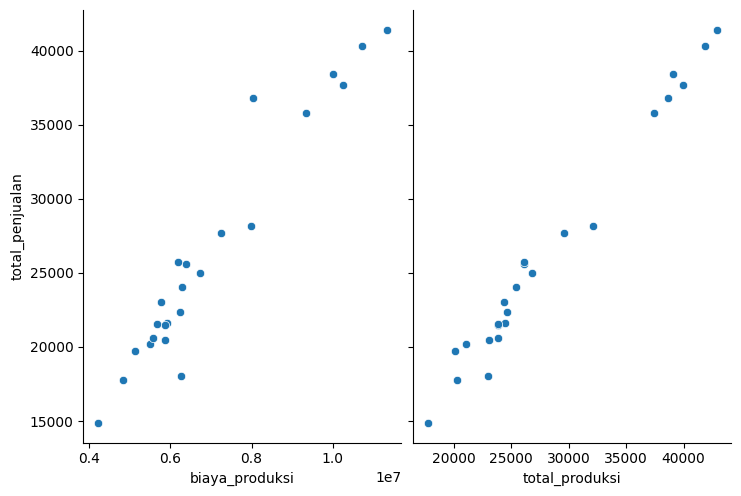

In [ ]:
#menganalisis bivariat antara variabel independent dan variabel dependent
#membuat plot dengan pairplot
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['biaya_produksi', 'total_produksi'], y_vars=['total_penjualan'], size=5, aspect=0.75)
plt.show()

plt.show()

<Axes: xlabel='total_produksi', ylabel='total_penjualan'>

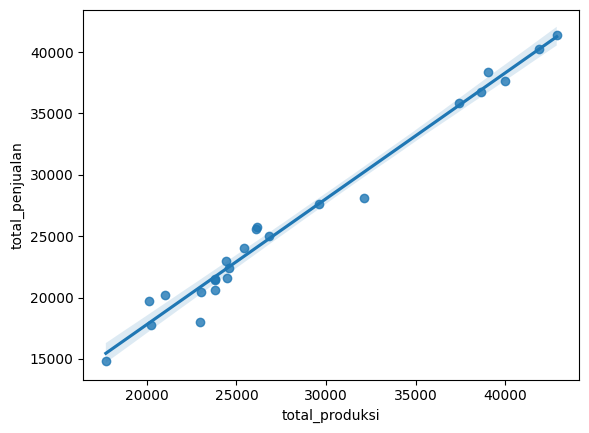

In [ ]:
#memvisualisasikan data
#membuat plot regresi yang menampilkan hubungan antara dua variabel.
sns.regplot(x=df['total_produksi'], y=df['total_penjualan'])

<Axes: xlabel='biaya_produksi', ylabel='total_penjualan'>

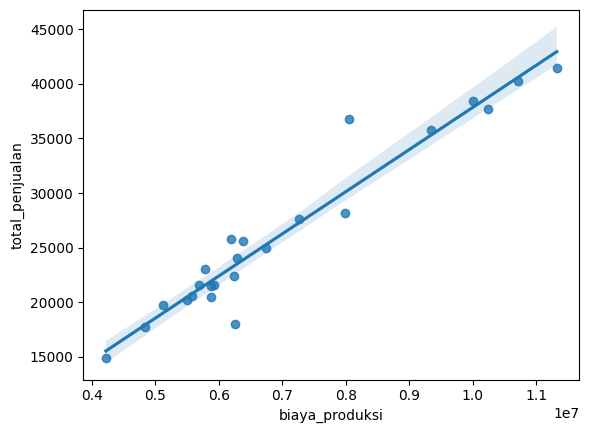

In [ ]:
sns.regplot(x=df['biaya_produksi'], y=df['total_penjualan'])

In [ ]:
#mengetahui nilai korelasi
styled_corr = df.corr().style.background_gradient().format(precision=2)
styled_corr

,biaya_produksi,total_produksi,total_penjualan
biaya_produksi,1.00,0.98,0.97
total_produksi,0.98,1.00,0.99
total_penjualan,0.97,0.99,1.00


In [ ]:
df.head()

,biaya_produksi,total_produksi,total_penjualan
0,6384000,26100,25620
1,10012000,39046,38406
2,5500000,21020,20170
3,6258000,22988,18008
4,5124000,20112,19746


In [ ]:
x=df.drop(columns='total_penjualan')
y=df['total_penjualan']

In [ ]:
#membagi data menjadi train dan test
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.2, random_state=4)

In [ ]:
#cek shape dari data training dan data testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)




(19, 2)
(19,)
(5, 2)
(5,)


In [ ]:
#membuat objek linear regresi
lin_reg = LinearRegression()

In [ ]:
#melatih model dengan menggunakan data training yang sudah di split
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
#menampilkan koefisien dan intersep model regresi linear yang telah dilatih
print(f"Koefisien: {lin_reg.coef_}, Intersep: {lin_reg.intercept_}")

Koefisien: [4.10721744e-04 9.18970348e-01], Intersep: -2501.446882677752


In [ ]:
#menghitung skor R-squared (koefisien determinasi) model regresi linear pada test set.
lin_reg.score(x_test,y_test)

0.9399035558473883

In [ ]:
lin_reg.predict([[6258000,22988]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([21194.14015438])

In [ ]:
#mendefinisikan nilai prediksi
y_pred = pd.DataFrame(x_test).dot(lin_reg.coef_) + lin_reg.intercept_

In [ ]:
#menghitung MAPE
def MAPE(Y_actual,Y_predicted):
    MAPE=np.mean(np.abs((y_test-y_pred)/y_test))*100
    return MAPE

In [ ]:
#melatih model regresi linear pada data train set
#menyimpan fungsi prediksi dari model regresi dalam variabel LR_Test_predict
linear_model=LinearRegression().fit(x_train,y_train)
LR_Test_predict=linear_model.predict

In [ ]:
#menghitung dan mencetak nilai Mean Absolute Percentage Error (MAPE)
LR_MAPE=MAPE(y_test,LR_Test_predict)
print("MAPE:",LR_MAPE)

MAPE: 5.9130234373867285


In [ ]:
#membuat dan menampilkan dataframe yang berisi nilai target aktual dan nilai target prediksi
df_pred = pd.DataFrame(np.column_stack((y_test, y_pred)),
                       columns=['Actual', 'Predicted'])
df_pred.head(3)

,Actual,Predicted
0,37682,38457
1,21547,21728
2,25620,24106


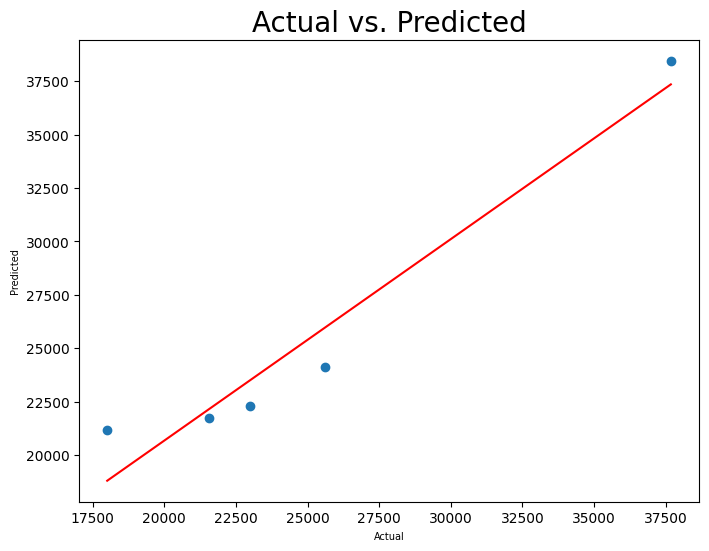

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Actual vs. Predicted", fontsize=20)
plt.xlabel("Actual", fontsize=7)
plt.ylabel("Predicted", fontsize=7)
plt.scatter(y_test, y_pred)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color='red')
plt.show()

In [ ]:
# Asumsi y_test dan y_pred sudah didefinisikan sebelumnya
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.0f}")

RMSE: 1648


In [ ]:
# Asumsi y_test dan y_pred sudah didefinisikan sebelumnya
directional_error = np.sign(y_pred - y_test)
mde = np.mean(directional_error)

print(f"MDE: {mde:.2f}")

MDE: 0.20


In [ ]:
from sklearn.metrics import mean_absolute_error

def mean_deviation_error_sklearn(y_test, y_pred):
  """
  Menghitung MDE menggunakan Scikit-learn.

  Args:
    y_test: Nilai aktual.
    y_pred: Nilai prediksi.

  Returns:
    Nilai MDE.
  """

  mde = mean_absolute_error(y_test, y_pred)
  return mde

In [ ]:
mde = mean_absolute_error(y_test, y_pred)
print(f"Mean Deviation Error (MDE): {mde:.0f}")

Mean Deviation Error (MDE): 1272
